<a href="https://colab.research.google.com/github/amritanshu009/DSAexperiments/blob/main/LR_better_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# upgrade sklearn

!pip install scikit-learn --upgrade

In [ ]:
!pip install mlflow

In [ ]:
!pip install dagshub

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score


In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import json
import joblib
import os
import yaml
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
import sklearn

sklearn.__version__

'1.6.1'

In [ ]:
# load the data

DATA_PATH = "/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv"

df = pd.read_csv(DATA_PATH)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv'

In [ ]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("Reddit_Data.csv")  # Uses the uploaded file
df.head()


Saving Reddit_Data.csv to Reddit_Data (3).csv


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.rename({"clean_comment":"comment",
           "category":"sentiment"},axis=1,inplace=True)

In [ ]:
(
    df.isna().sum()
)

,0
comment,100
sentiment,0


In [ ]:
(
    df.loc[
        df['comment'].isna()
    ]
)

,comment,sentiment
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
(
    df.loc[
        df['comment'].isna(),"sentiment"
    ]
    .value_counts()
)

,count
sentiment,
0,100


In [ ]:
# remove missing values

print("Rows in data before removing missing values ",df.shape[0])

df = df.dropna()

print("Rows in data after removing missing values ",df.shape[0])

Rows in data before removing missing values  37249
Rows in data after removing missing values  37149


In [ ]:
from sklearn.utils import resample

# Optional but safe: drop duplicate comments
df = df.drop_duplicates(subset=['comment'])
print("Rows in data after removing duplicate comments: ", df.shape[0])

# Check original distribution
print("Original class distribution:")
print(df['sentiment'].value_counts())

# Separate classes
df_pos = df[df['sentiment'] == 1]
df_neu = df[df['sentiment'] == 0]
df_neg = df[df['sentiment'] == -1]

# Upsample minority classes
df_neu_up = resample(df_neu, replace=True, n_samples=len(df_pos), random_state=42)
df_neg_up = resample(df_neg, replace=True, n_samples=len(df_pos), random_state=42)

# Combine and shuffle
df = pd.concat([df_pos, df_neu_up, df_neg_up])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new balance
print("Balanced class distribution:")
print(df['sentiment'].value_counts())


Rows in data after removing duplicate comments:  36799
Original class distribution:
sentiment
 1    15771
 0    12778
-1     8250
Name: count, dtype: int64
Balanced class distribution:
sentiment
-1    15771
 0    15771
 1    15771
Name: count, dtype: int64


In [ ]:
df['comment'].duplicated().sum()

np.int64(15509)

In [ ]:
print("Rows in data before removing duplicate rows ",df.shape[0])

df = df.drop_duplicates(subset=['comment'])

print("Rows in data after removing duplicate rows ",df.shape[0])

Rows in data before removing duplicate rows  47313
Rows in data after removing duplicate rows  31804


In [ ]:
from sklearn.utils import resample

# Separate by sentiment
df_pos = df[df['sentiment'] == 1]
df_neu = df[df['sentiment'] == 0]
df_neg = df[df['sentiment'] == -1]

# Upsample neutral and negative to match positive count
df_neu_up = resample(df_neu, replace=True, n_samples=len(df_pos), random_state=42)
df_neg_up = resample(df_neg, replace=True, n_samples=len(df_pos), random_state=42)

# Combine all into a balanced dataset
df = pd.concat([df_pos, df_neu_up, df_neg_up])
df = df.sample(frac=1).reset_index(drop=True)

# Confirm new class distribution
print("Balanced class counts:")
print(df['sentiment'].value_counts())


Balanced class counts:
sentiment
 0    15771
-1    15771
 1    15771
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

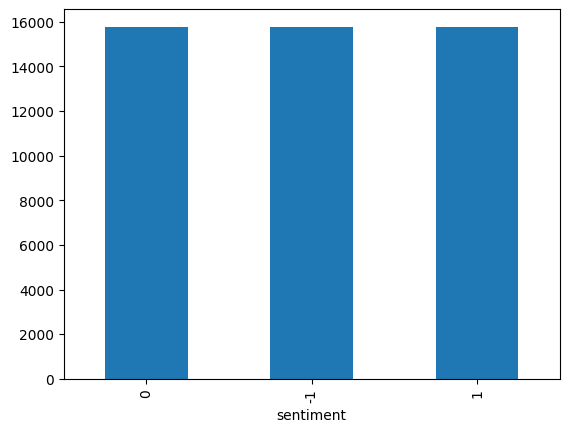

In [ ]:

(
    df['sentiment']
    .value_counts()
    .plot(kind='bar')
)

In [ ]:
# remove whitespaces

df['comment'] = df['comment'].str.lstrip()

In [ ]:
def count_words(text):
    return len(text.split(" "))

In [ ]:
df['word_count'] = df['comment'].apply(count_words)

In [ ]:
# statistics on word_count

df['word_count'].agg(['min','max','mean'])

,word_count
min,1.000000
max,1308.000000
mean,30.125653


In [ ]:
# convert all the sentences to lowercase

df['comment'] = df['comment'].str.lower()

In [ ]:
def removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    return text

def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [ ]:
df['comment'].head()

,comment
0,you jpg
1,fucking tears @ the icu one
2,their voices and acting aren bad who cares the...
3,really have very little issue with bjp economi...
4,revolutionary and the ballsiest step govt has ...


In [ ]:
def preprocess_text(text):
    text = removing_numbers(text)
    text = removing_urls(text)
    text = removing_punctuations(text)

    return text

df['comment'] = df['comment'].apply(preprocess_text)

In [ ]:
# remove stopwords from comments

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

df['comment'] = df['comment'].apply(remove_stopwords)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatize the text

# lemmatizer to be used instead. not working in kaggle.

def stemming(text):
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text.split(" ")]
    return " ".join(text)

df['comment'] = df['comment'].apply(stemming)

In [ ]:
# make X and y

X = df.drop(columns='sentiment')
y = df['sentiment']

X

,comment,word_count
0,jpg,3
1,fuck tear icu one,7
2,voic act bad care experi start somewher someth...,36
3,realli littl issu bjp econom polici think clea...,40
4,revolutionari ballsiest step govt taken countr...,14
...,...,...
47308,ride plank develop elect peopl get hype sinc p...,47
47309,disciplin dedic lot â€™ shakha incorpor good v...,26
47310,ever consid make funni satir video indian poli...,20
47311,modi fie bric,3


In [ ]:
# train test split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True,stratify=y)

print("The shape of X_train is",X_train.shape)
print("The shape of X_test is",X_test.shape)

The shape of X_train is (37850, 2)
The shape of X_test is (9463, 2)


Text(0.5, 1.0, 'Test Data')

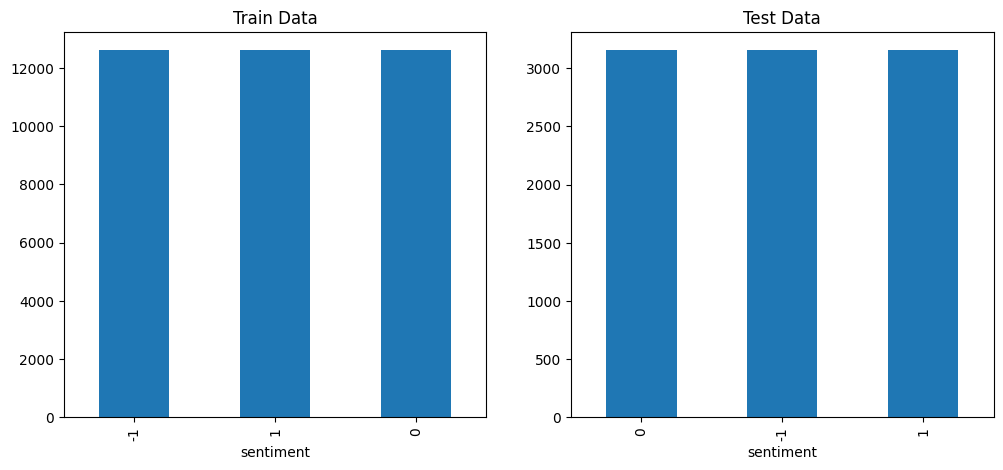

In [ ]:
# plot the two graphs

fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar')
plt.title("Train Data")

plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar')
plt.title("Test Data")

In [ ]:
sklearn.set_config(transform_output='default')

In [ ]:
# transform the output variable
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# form the preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('encode',CountVectorizer(decode_error='ignore'),'comment'),
    ('scale',StandardScaler(),['word_count'])
],n_jobs=-1)

preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('encode',
                                 CountVectorizer(decode_error='ignore'),
                                 'comment'),
                                ('scale', StandardScaler(), ['word_count'])])

In [ ]:
preprocessor.fit_transform(X_train.sample(20)).toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.11087042],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.31555427],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.34750203],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.44348168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.95519131],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.        ,  1.64599931]])

In [ ]:
# form the model building pipeline

model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',None)
])

In [ ]:
# list of preprocessors

preprocessors = [CountVectorizer(decode_error='ignore'),TfidfVectorizer(decode_error='ignore')]

# list of classifiers
classifiers = [
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    SVC(class_weight='balanced'),
    RandomForestClassifier(class_weight='balanced'),
    GradientBoostingClassifier(),  # doesn't support class_weight directly
    XGBClassifier(objective="multi:softmax", num_class=3),
    LGBMClassifier()
]

In [ ]:
# params grid

params_grid = {
    "preprocessor__encode": preprocessors,
    "clf": classifiers
}

search = GridSearchCV(model_pipe,params_grid,
                      scoring='accuracy',n_jobs=-1,
                     cv=3,verbose=3)

search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('encode',
                                                                         CountVectorizer(decode_error='ignore'),
                                                                         'comment'),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['word_count'])])),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid={'clf': [LogisticRegression(class_weight='balanced',
                                                    max_iter=1000),
                                 SVC(class_weight='balanced'),
                                 RandomForest...
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_class=3,
                                               num_parallel_tree=None, ...),
                                 LGBMClassifier()],
                         'preprocessor__encode': [CountVectorizer(decode_error='ignore'),
                                                  TfidfVectorizer(decode_error='ignore')]},
             scoring='accuracy', verbose=3)

In [ ]:
# fit the grid search

search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('encode',
                                                                         CountVectorizer(decode_error='ignore'),
                                                                         'comment'),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['word_count'])])),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid={'clf': [LogisticRegression(class_weight='balanced',
                                                    max_iter=1000),
                                 SVC(class_weight='balanced'),
                                 RandomForest...
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_class=3,
                                               num_parallel_tree=None, ...),
                                 LGBMClassifier()],
                         'preprocessor__encode': [CountVectorizer(decode_error='ignore'),
                                                  TfidfVectorizer(decode_error='ignore')]},
             scoring='accuracy', verbose=3)

In [ ]:
# best score
search.best_score_

np.float64(0.8889299161329558)

In [ ]:
# best preprocessor-model combo
search.best_params_

{'clf': RandomForestClassifier(class_weight='balanced'),
 'preprocessor__encode': CountVectorizer(decode_error='ignore')}

In [ ]:
# cv results

pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_preprocessor__encode,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,12.183056,0.608668,1.109145,0.174233,"LogisticRegression(class_weight='balanced', ma...",CountVectorizer(decode_error='ignore'),{'clf': LogisticRegression(class_weight='balan...,0.883966,0.884600,0.880390,0.882985,0.001853,3
1,11.987583,1.979804,1.322191,0.414915,"LogisticRegression(class_weight='balanced', ma...",TfidfVectorizer(decode_error='ignore'),{'clf': LogisticRegression(class_weight='balan...,0.852897,0.850836,0.842977,0.848903,0.004274,5
2,620.594356,31.250245,93.581107,1.274206,SVC(class_weight='balanced'),CountVectorizer(decode_error='ignore'),"{'clf': SVC(class_weight='balanced'), 'preproc...",0.834747,0.834271,0.831008,0.833342,0.001662,8
3,647.275866,7.917296,93.091741,1.370378,SVC(class_weight='balanced'),TfidfVectorizer(decode_error='ignore'),"{'clf': SVC(class_weight='balanced'), 'preproc...",0.867163,0.872157,0.867787,0.869036,0.002222,4
4,656.958026,39.257000,3.343129,0.040964,RandomForestClassifier(class_weight='balanced'),CountVectorizer(decode_error='ignore'),{'clf': RandomForestClassifier(class_weight='b...,0.886344,0.894190,0.886256,0.888930,0.003720,1
5,619.731528,40.378426,4.060597,0.448315,RandomForestClassifier(class_weight='balanced'),TfidfVectorizer(decode_error='ignore'),{'clf': RandomForestClassifier(class_weight='b...,0.884600,0.890545,0.884036,0.886394,0.002944,2
6,73.758353,1.300659,0.629230,0.012902,GradientBoostingClassifier(),CountVectorizer(decode_error='ignore'),"{'clf': GradientBoostingClassifier(), 'preproc...",0.719347,0.720694,0.719959,0.720000,0.000551,12
7,194.926586,13.052806,0.986885,0.339890,GradientBoostingClassifier(),TfidfVectorizer(decode_error='ignore'),"{'clf': GradientBoostingClassifier(), 'preproc...",0.724261,0.723865,0.725983,0.724703,0.000919,11
8,41.928456,1.249194,0.859387,0.014844,"XGBClassifier(base_score=None, booster=None, c...",CountVectorizer(decode_error='ignore'),"{'clf': XGBClassifier(base_score=None, booster...",0.820163,0.823651,0.816741,0.820185,0.002821,10
9,132.754512,2.601012,1.060267,0.230849,"XGBClassifier(base_score=None, booster=None, c...",TfidfVectorizer(decode_error='ignore'),"{'clf': XGBClassifier(base_score=None, booster...",0.818340,0.824205,0.819673,0.820740,0.002510,9


In [ ]:
results = dict(search.cv_results_)

In [ ]:
# This line ONLY affects file saving, not model output
pd.DataFrame(results).to_csv("results.csv", index=False)


In [ ]:
import pickle as pkl

with open("results.pkl", 'wb') as res:
    pkl.dump(results, res)


In [ ]:
# best model

best_model = search.best_estimator_

In [ ]:
import os
import joblib

# Save in a local "models" folder
output_dir = 'models'
os.makedirs(output_dir, exist_ok=True)

joblib.dump(best_model, os.path.join(output_dir, "best_model.joblib"))


['models/best_model.joblib']

In [ ]:
# get the train and test predictions

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("The train accuracy score is: ",accuracy_score(y_train,y_pred_train))
print("The train f1 score is: ",f1_score(y_train,y_pred_train,average='macro'))

print("#"*50)

print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("The test f1 score is: ",f1_score(y_test,y_pred_test,average='macro'))

The train accuracy score is:  0.9996565389696169
The train f1 score is:  0.9996565365194033
##################################################
The test accuracy score is:  0.9232801437176371
The test f1 score is:  0.9229305739262487


In [ ]:
# perform cross validation

score = cross_val_score(best_model,X_train,y_train,
                        cv=5,scoring='accuracy',
                        n_jobs=-1,verbose=2)
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 33.9min finished


array([0.90264201, 0.9009247 , 0.90858653, 0.90422721, 0.90303831])

In [ ]:
print(f"The avg cross val score is {score.mean():.4f}")

The avg cross val score is 0.9039


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
def preprocess_manual_comment(comment):
    # Clean and process the input just like training
    comment = comment.lower()
    comment = ''.join([i for i in comment if not i.isdigit()])
    comment = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', comment)
    comment = comment.replace('؛',"")
    comment = re.sub(r'https?://\S+|www\.\S+', '', comment)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(comment)
    filtered = [w for w in tokens if w not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in filtered]
    processed_text = " ".join(stemmed)

    return processed_text

def predict_sentiment(comment):
    processed_comment = preprocess_manual_comment(comment)
    word_count = len(processed_comment.split())

    # Wrap in DataFrame to match model input
    input_df = pd.DataFrame({'comment': [processed_comment], 'word_count': [word_count]})

    # Predict
    prediction = best_model.predict(input_df)[0]

    # Map back to label
    label = le.inverse_transform([prediction])[0]

    # Convert to numerical sentiment
    sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
    return sentiment_map.get(label, "Unknown"), label


In [ ]:
def predict_manual_comment_sentiment(comment):
    processed = preprocess_manual_comment(comment)
    wc = len(processed.split())

    input_df = pd.DataFrame({'comment': [processed], 'word_count': [wc]})

    pred = best_model.predict(input_df)[0]  # This will be 0, 1, or 2

    # Reverse lookup based on LabelEncoder order: [-1, 0, 1]
    label_mapping = {
        0: "Negative",   # encoded -1
        1: "Neutral",    # encoded  0
        2: "Positive"    # encoded  1
    }
    score_mapping = {
        0: -1,
        1: 0,
        2: 1
    }

    return label_mapping.get(pred, "Unknown"), score_mapping.get(pred, "Unknown")


In [ ]:
print(predict_manual_comment_sentiment("This video is trash."))
print(predict_manual_comment_sentiment("Wow I loved every second of it!"))
print(predict_manual_comment_sentiment("It's just okay I guess."))


('Neutral', 0)
('Positive', 1)
('Positive', 1)
